# Machine Learning analysis on covid-19 dataset

## Types of Data used
1. Raw_data1.csv: This is the data of each recorded case in India from the first case reported on Jan 30, 2020 till May 11,2021. This includes information like Age,State,serial number,gender

2. case_time_series.csv: This is the Time Series data of the daily and overall increase in active,recovered and deceased people in India. We shall be using ml models on this data set.

3. districts.csv : This is distribution of cases and their rise in each district of india

4. state_wise_daily: This is the times series data but for each state. Similar model as used on national times series can be done on each state to predict state wise increase.

In [ ]:
import numpy as np 
import pandas as pd
data=pd.read_csv('raw_data1.csv')
data1=pd.read_csv('case_time_series.csv')
data2=pd.read_csv('/content/districts (1).csv')
data3=pd.read_csv('state_wise_daily.csv')
plt.rcParams['figure.figsize']=(20,6)

In [ ]:
data.head()

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num Cases
0,1.0,KL-TS-P1,30-01-2020,NaN,20.0,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14-02-2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1
1,2.0,KL-AL-P1,02-02-2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14-02-2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1
2,3.0,KL-KS-P1,03-02-2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14-02-2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,1
3,4.0,DL-P1,02-03-2020,NaN,45.0,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15-03-2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,1
4,5.0,TS-P1,02-03-2020,NaN,24.0,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,02-03-2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",1


# Visualization

None we try to do analyze the distribution of covid casesin India and the role of gender in covid distribution in india .

# Average Age for infected people based on gender

male average is 39.03399122807018
female average is 39.597892888498684


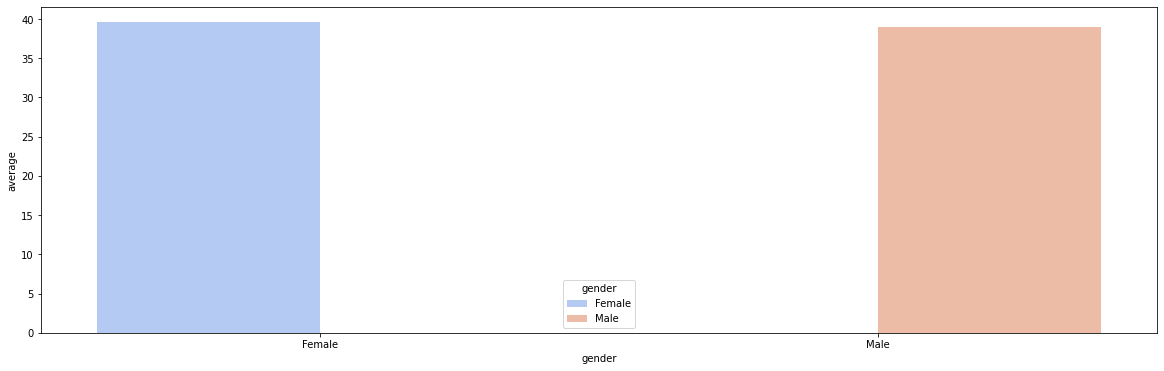

In [ ]:
#visualization data

import seaborn as sns
import matplotlib.pyplot as plt

df=data.dropna(subset=['Gender'])
df=data.dropna(subset=['Age Bracket'])

x2=df.loc[:,:'Gender']


a1 = x2[x2['Gender']=='F']
a2= x2[x2['Gender']=='M']

mavg=a1['Age Bracket'].astype(float).mean()

favg=a2['Age Bracket'].astype(float).mean()

print("male average is "+ str(mavg))
print("female average is "+ str(favg))

avg=pd.DataFrame([[favg,"Female"],[mavg,'Male']])


avg.columns=["average","gender"]
sns.barplot(data=avg,x=avg["gender"],y=avg["average"],hue=avg["gender"],palette="coolwarm")

# Conclusion:

 Gender has very little impact on covid infection Rates

# Distribution with regards to age in India based on Gender

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

[Text(0.5, 1.0, 'Covid infection Distribution in Females')]

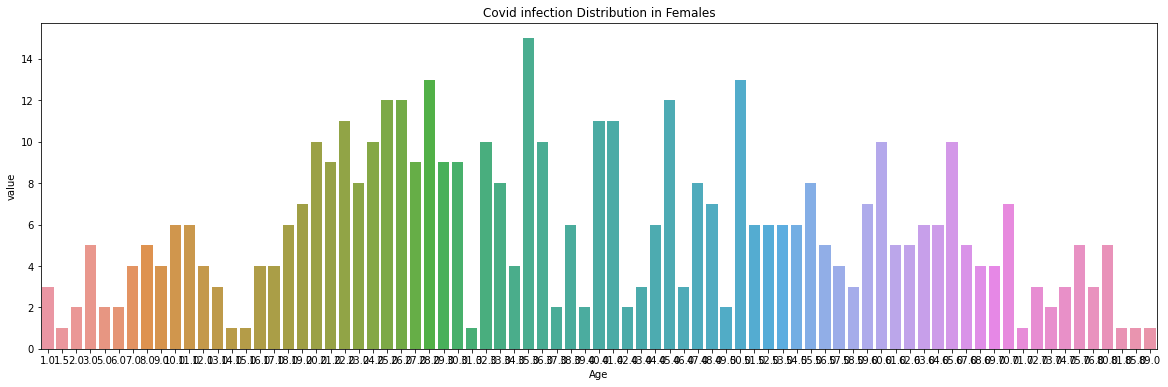

In [ ]:
a1["value"]=1
a1.drop(["Patient Number",'State Patient Number',"Date Announced",'Estimated Onset Date',"Gender"],inplace=True,axis=1)
new=a1.groupby(["Age Bracket"]).sum()
a1["value"]=(a1["value"]/79)*100
new["Age"]=new.index
sns.barplot(data=new,y=new["value"],x=new["Age"]).set(title='Covid infection Distribution in Females')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0.5, 1.0, 'Covid infection Distribution in Males')]

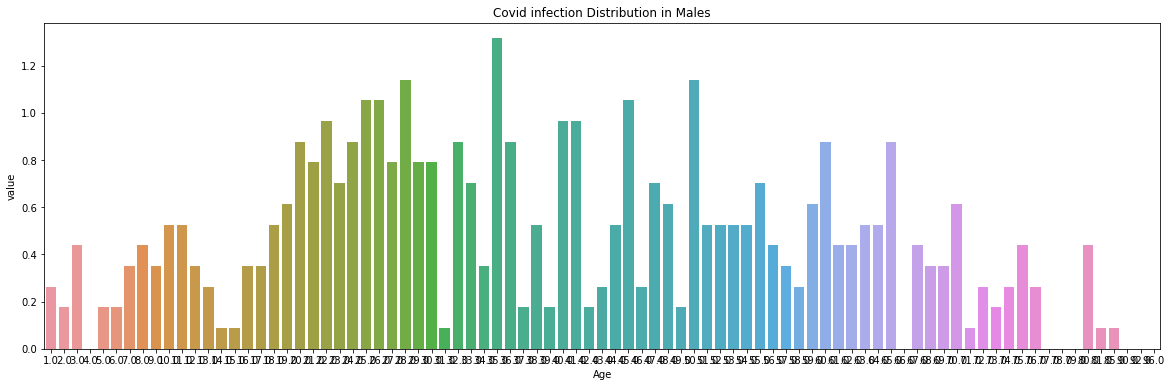

In [ ]:
a2["value"]=1
a2.drop(["Patient Number",'State Patient Number',"Date Announced",'Estimated Onset Date',"Gender"],inplace=True,axis=1)
newm=a2.groupby(["Age Bracket"]).sum()
newm["value"]=(new["value"]/1139)*100
newm["Age"]=newm.index
sns.barplot(data=newm,y=newm["value"],x=newm["Age"]).set(title='Covid infection Distribution in Males')

#  Average Distribution in males

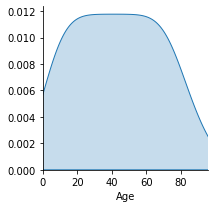

In [ ]:


facet=sns.FacetGrid(newm)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, newm['Age'].max()))
facet.add_legend()

# Average Distribution in Females

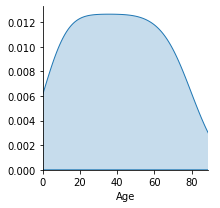

In [ ]:
new["Age"]=new.index

facet=sns.FacetGrid(new)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, new['Age'].max()))
facet.add_legend()



# Conclusion:

Most infections in India has happend in the age group of 20-60

In [ ]:
data1.head()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0


# Machine Learning Model for Predictions

Using the Data set of all the time Series infections in india we firstly try to predict them using Simple models like Decision Trees, KNN and Random Forest

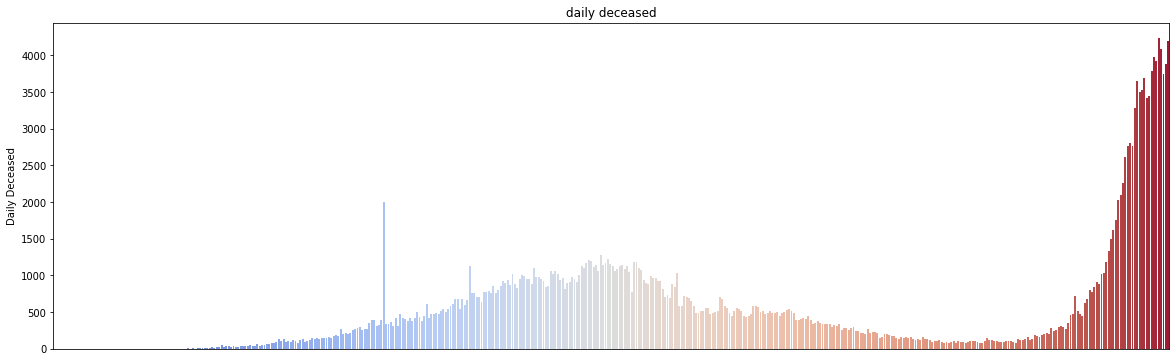

In [ ]:
de=sns.barplot(x=data1['Date'], y=data1['Daily Deceased'],palette="coolwarm" )

de.set(xticklabels=[])  
de.set(title='daily deceased')
de.set(xlabel=None)
de.tick_params(bottom=False)

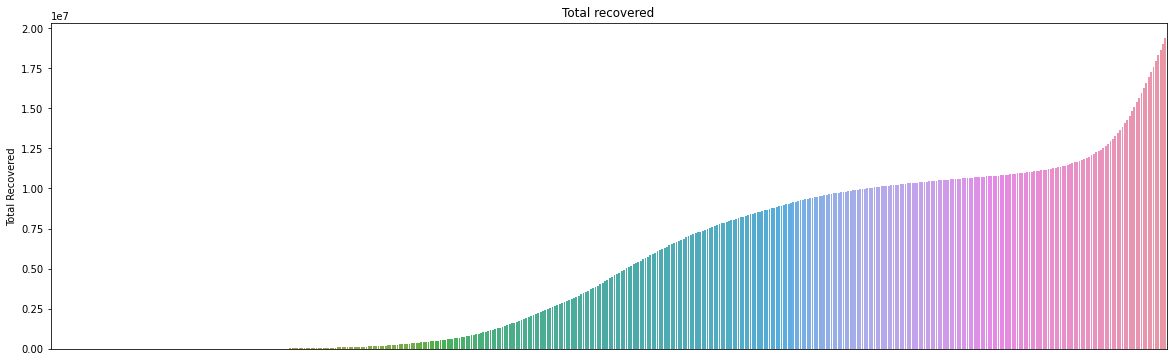

In [ ]:
dead=data1["Daily Recovered"]


tre=sns.barplot(x=data1['Date'], y=data1['Total Recovered'])


tre.set(xticklabels=[])  
tre.set(title='Total recovered')
tre.set(xlabel=None)
tre.tick_params(bottom=False)

plt.show()

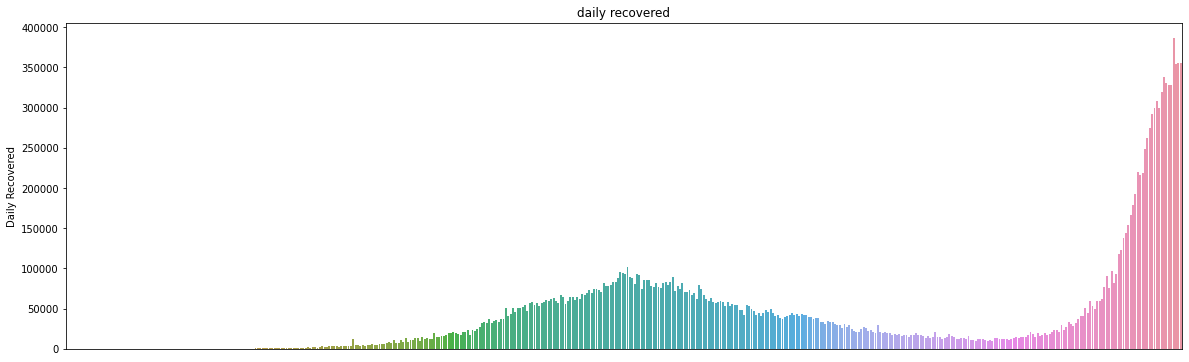

In [ ]:
re=sns.barplot(x=data1['Date'], y=data1['Daily Recovered'])


re.set(xticklabels=[])  
re.set(title='daily recovered')
re.set(xlabel=None)
re.tick_params(bottom=False)

# Conclusion :

The number of Deaths and Recoveries increase simultenously as the cases increases and thus cant be used as seperate factors for model predictions

# State Wise Distribution of cases 

We are gonna be building an ml model on national time series data but we also have access to state wise data and can easily build custom prediction models for each State if need be.

In [ ]:
latest=data2[data2['Date']=="2021-05-11"]
latest.head()
latest.drop(["Tested"],inplace=True,axis=1)
latest=latest.groupby(["State"]).sum()
latest.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Confirmed,Recovered,Deceased,Other
State,,,,
Andaman and Nicobar Islands,6426,6149,78,0
Andhra Pradesh,1322934,1118933,8899,0
Arunachal Pradesh,20575,18583,68,0
Assam,304429,261980,1838,1347
Bihar,612570,507041,3429,1


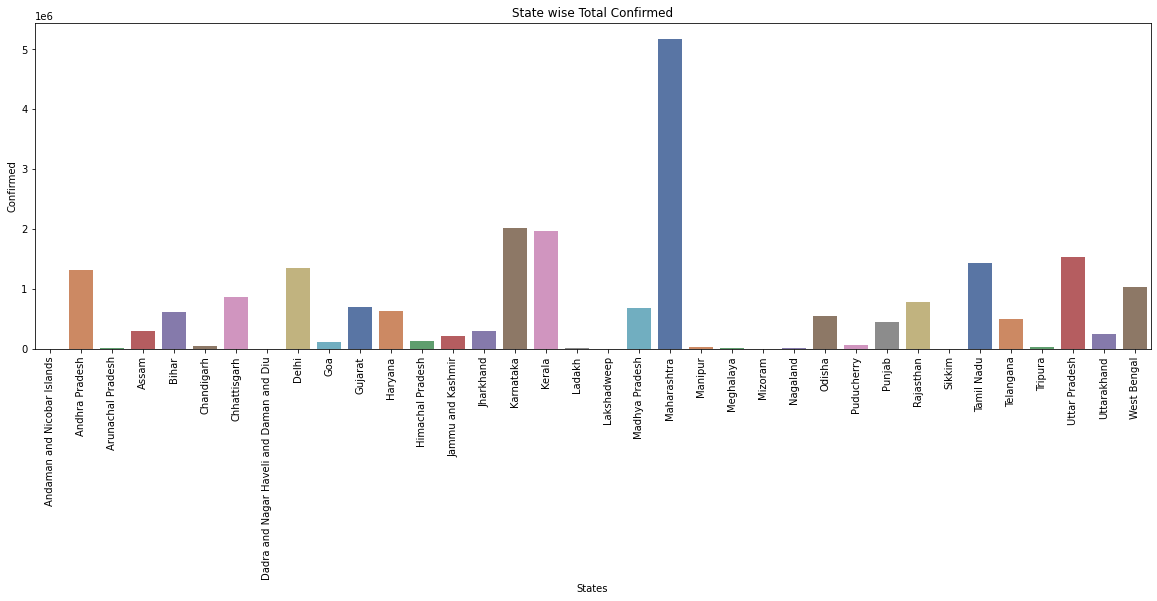

In [ ]:
sns.barplot(data=latest,y=latest["Confirmed"],x=latest.index,palette="deep").set(title="State wise Total Confirmed")
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("Confirmed")
plt.show()

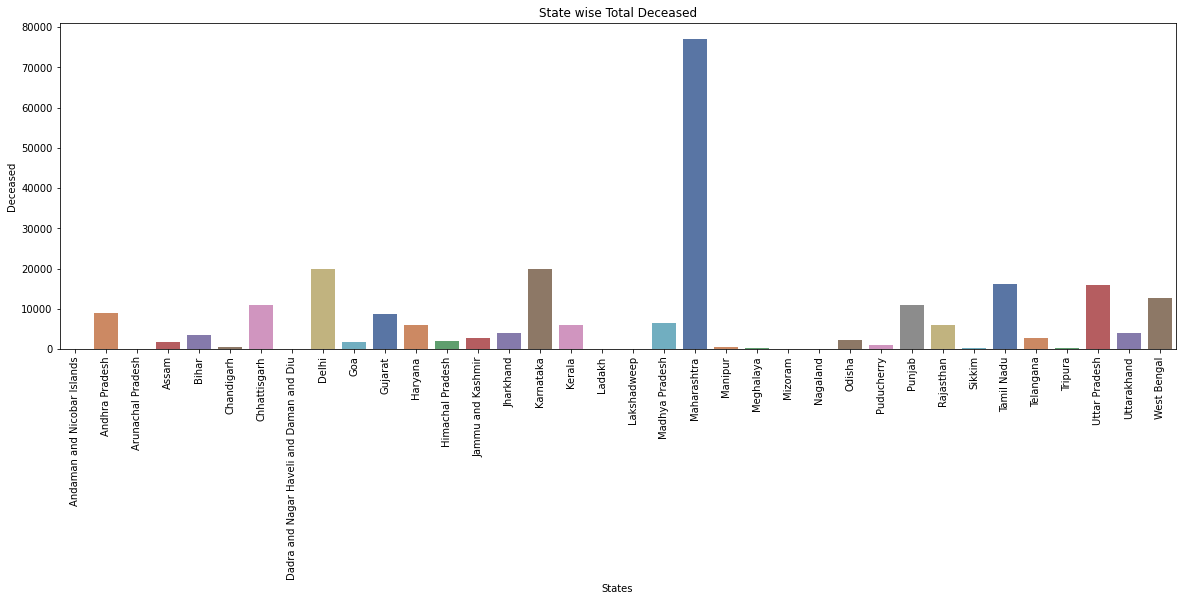

In [ ]:
sns.barplot(data=latest,y=latest["Deceased"],x=latest.index,palette="deep").set(title="State wise Total Deceased")
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("Deceased")
plt.show()

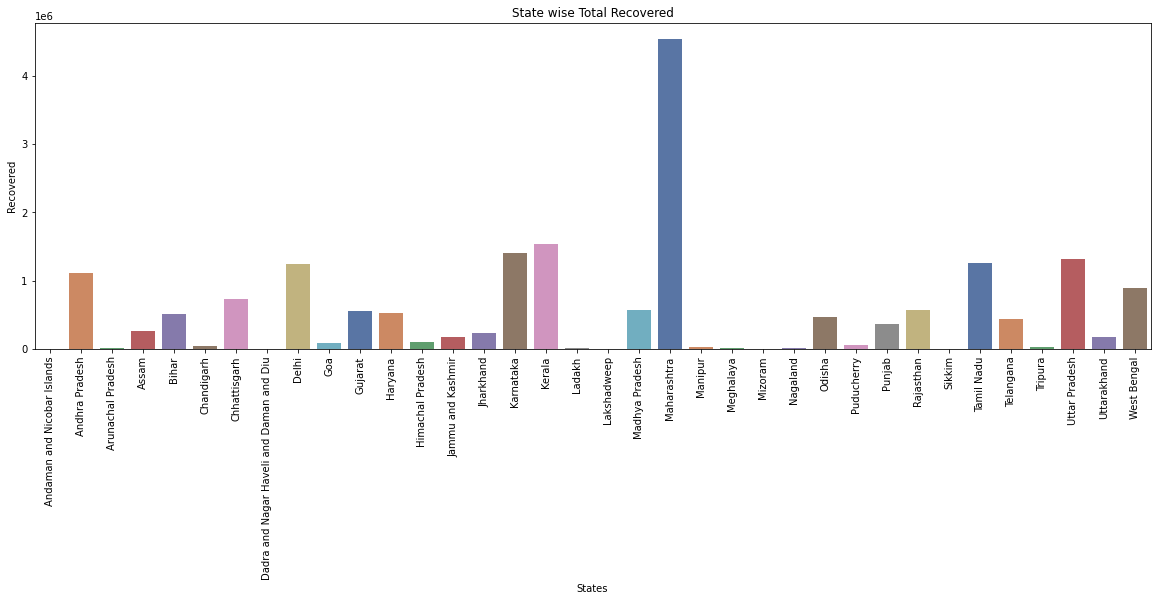

In [ ]:
sns.barplot(data=latest,y=latest["Recovered"],x=latest.index,palette="deep").set(title="State wise Total Recovered")
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("Recovered")
plt.show()

# Conclusion:

The difference in moratlity and cases can help us identify more deadly strains of viruses and judge better handling of situations and better health care facilities.

In [ ]:
data1.drop(['Date'],inplace=True,axis=1)

In [ ]:
data1['days_from_start'] = (data1.index - data1.index[0])
data1['previous_confirmed']=0
data1['previous_rise']=0

for i in range(1,468):
    data1.loc[i,'previous_confirmed']=data1.loc[i-1,'Total Confirmed']

for i in range(1,468):
    data1.loc[i,'previous_rise']=data1.loc[i-1,'Daily Confirmed']
    


In [ ]:
data1.head()

,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,days_from_start,previous_confirmed,previous_rise
0,2020-01-30,1,1,0,0,0,0,0,0,0
1,2020-01-31,0,1,0,0,0,0,1,1,1
2,2020-02-01,0,1,0,0,0,0,2,1,0
3,2020-02-02,1,2,0,0,0,0,3,1,0
4,2020-02-03,1,3,0,0,0,0,4,2,1


# Building of Ml Model 

1. Cleaning of data
2. Selection of Features
3. Feature Creation
4. Training
5. Prediction

In [ ]:
data1.tail()

,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,days_from_start,previous_confirmed,previous_rise
463,2021-05-07,406901,21892066,327675,17925061,4233,237716,463,21485165,414280
464,2021-05-08,403808,22295874,386395,18311456,4092,241808,464,21892066,406901
465,2021-05-09,366455,22662329,353777,18665233,3749,245557,465,22295874,403808
466,2021-05-10,329491,22991820,355930,19021163,3879,249436,466,22662329,366455
467,2021-05-11,348524,23340344,355386,19376549,4198,253634,467,22991820,329491


In [ ]:
#Splitting of Data int test and training set
x=data1[['days_from_start','previous_confirmed',"previous_rise"]]
y=data1[['Daily Confirmed']]


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42)


In [ ]:
#training
from sklearn.ensemble import RandomForestRegressor
rnd_clf = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
pred=rnd_clf.predict(x_test)
rmse=mean_squared_error(pred,y_test)
rmse # the mean squared error is used here as a metric 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


64885919.07443322

In [ ]:
predictions=rnd_clf.predict(x)
actual=y.to_numpy()
actuals=[]
for i in actual:
    actuals.append(i[0])

In [ ]:
#inference
i=int(input())
print("on day, ",i ," actual cases were ", actuals[i],"but the predicted cases were ",predictions[i])

250
on day,  250  actual cases were  71869 but the predicted cases were  61593.541306124214


# Conclusion:
As we can see our model fits quite satisfactorily on the existing data giving error in a powers of 2-3

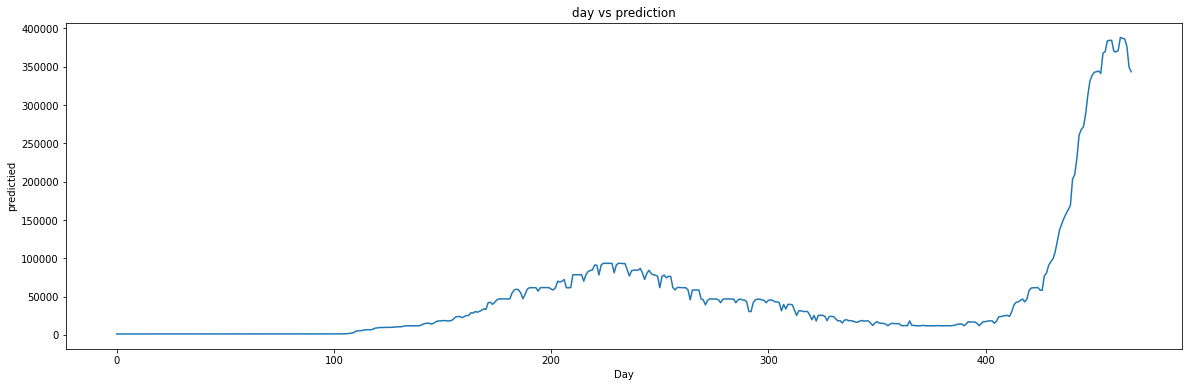

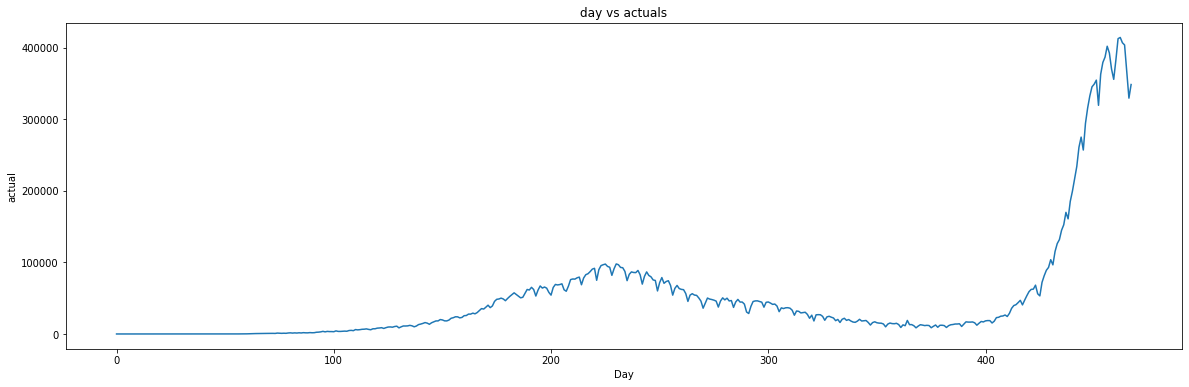

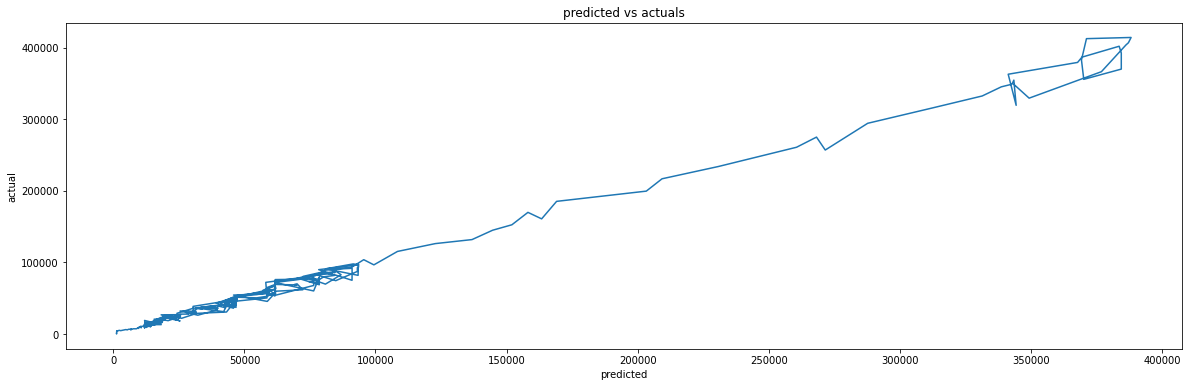

In [ ]:
import matplotlib.pyplot as plt

plt.plot( range(468),predictions)
plt.title('day vs prediction')
plt.xlabel('Day')
plt.ylabel('predictied')
plt.show()

import matplotlib.pyplot as plt

plt.plot( range(468),actuals)
plt.title('day vs actuals')
plt.xlabel('Day')
plt.ylabel('actual')
plt.show()

import matplotlib.pyplot as plt

plt.plot( predictions,actuals)
plt.title('predicted vs actuals')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

# Comparision of predicted and actual

In [ ]:
actual_sample=[]
pred_sample=[]
for i in range(0,468,10):
    pred_sample.append(predictions[i])
    
for i in range(0,468,10):
    actual_sample.append(actuals[i])



pdpred=pd.DataFrame(pred_sample)
pdpred.columns=["predictions"]

pdact=pd.DataFrame(actual_sample)
pdact.columns=["actuals"]

comparision=pd.concat([pdpred,pdact],axis=1)
pdpred.columns=["values"]
pdpred["ind"]=pdpred.index
pdpred["type"]="prediction"
pdact.columns=["values"]
pdact["ind"]=pdact.index
pdact["type"]="actual"

mapall=pd.concat([pdpred,pdact],axis=0)
mapall

,values,ind,type
0,1212.76371,0,prediction
1,1212.76371,1,prediction
2,1212.76371,2,prediction
3,1212.76371,3,prediction
4,1212.76371,4,prediction
...,...,...,...
42,59083.00000,42,actual
43,103794.00000,43,actual
44,199584.00000,44,actual
45,348996.00000,45,actual


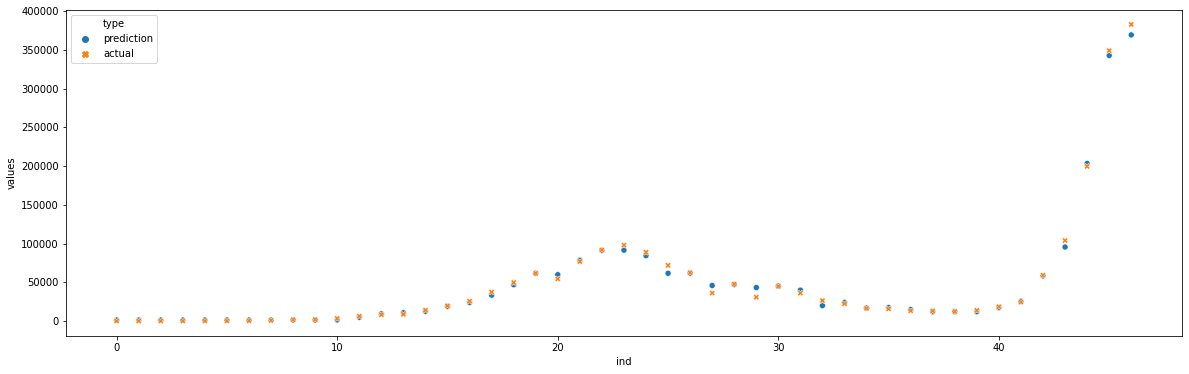

In [ ]:
sns.scatterplot(data=mapall,x=mapall["ind"],y=mapall["values"],hue=mapall["type"],style=mapall["type"])

In [ ]:
# Training other models to check for better results

from sklearn.tree import DecisionTreeRegressor
treeclf =DecisionTreeRegressor()
treeclf.fit(x_train, y_train)
predtree=rnd_clf.predict(x_test)
rmsetree=mean_squared_error(predtree,y_test)
rmsetree

64885919.07443322

In [ ]:
predictions=treeclf.predict(x)
actual=y.to_numpy()
actuals=[]
for i in actual:
    actuals.append(i[0])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnclf= KNeighborsRegressor()
knnclf.fit(x_train,y_train)
predknn=knnclf.predict(x_test)
rmseknn=mean_squared_error(predknn,y_test)
rmseknn

96378134.89489357

In [ ]:
predictions2=knnclf.predict(x)
actual=y.to_numpy()
actuals=[]
for i in actual:
    actuals.append(i[0])

In [ ]:
i=int(input())
print("on day, ",i ," actual cases were ", actuals[i],"but the predicted cases were ",predictions[i])

250
on day,  250  actual cases were  71869 but the predicted cases were  71869.0


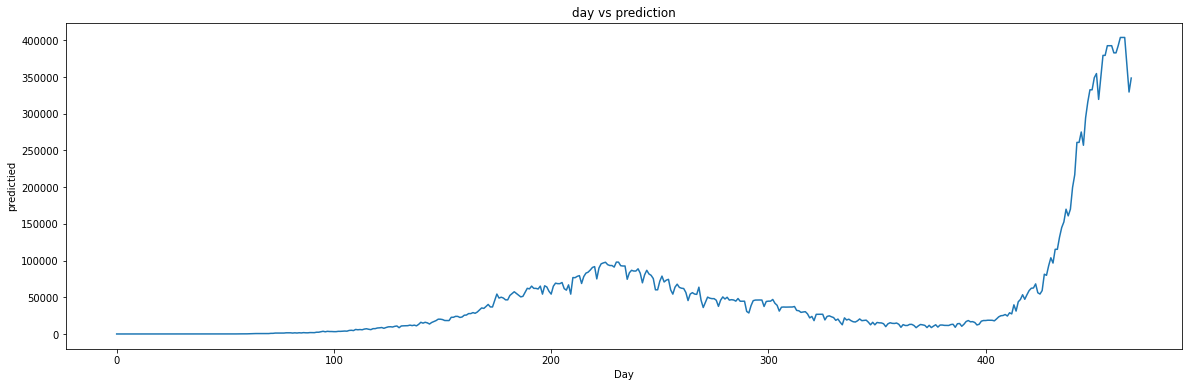

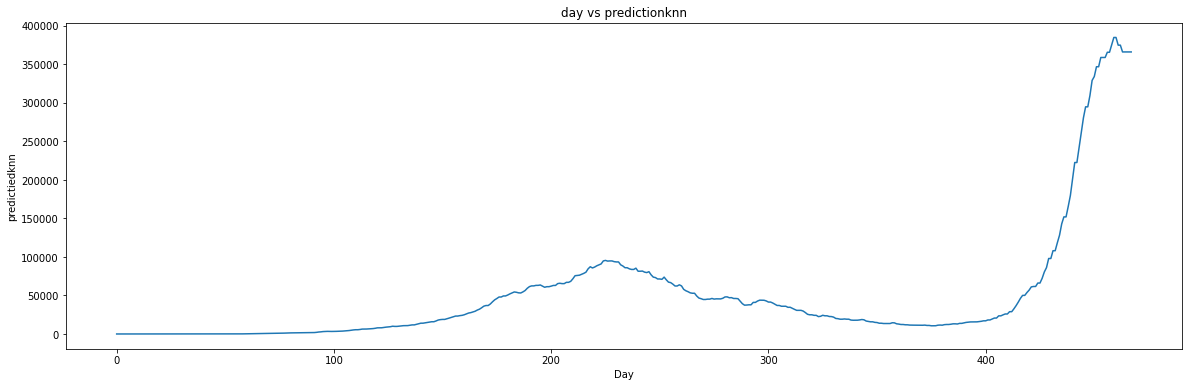

In [ ]:
import matplotlib.pyplot as plt

plt.plot( range(468),predictions)
plt.title('day vs prediction')
plt.xlabel('Day')
plt.ylabel('predictied')
plt.show()



import matplotlib.pyplot as plt

plt.plot( range(468),predictions2)
plt.title('day vs predictionknn')
plt.xlabel('Day')
plt.ylabel('predictiedknn')
plt.show()




In [ ]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:
    print(deg)
    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

1
2
3
4
5
6
7
8
9
Best degree 3 with RMSE 7211.164964832907


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=3
model5=make_pipeline(PolynomialFeatures(),LinearRegression())
model5.fit(x_train,y_train)
print('Polynomial Regression model Created')

Polynomial Regression model Created


In [ ]:
predpoly=model5.predict(x_test)
poly=mean_squared_error(predpoly,y_test)
poly

59665300.40423965

In [ ]:
predictionsp=model5.predict(x)
actual=y.to_numpy()
actuals=[]
for i in actual:
    actuals.append(i[0])

In [ ]:
i=int(input())
print("on day, ",i ," actual cases were ", actuals[i],"but the predicted cases were ",predictionsp[i])

50
on day,  50  actual cases were  58 but the predicted cases were  [288.0042958]


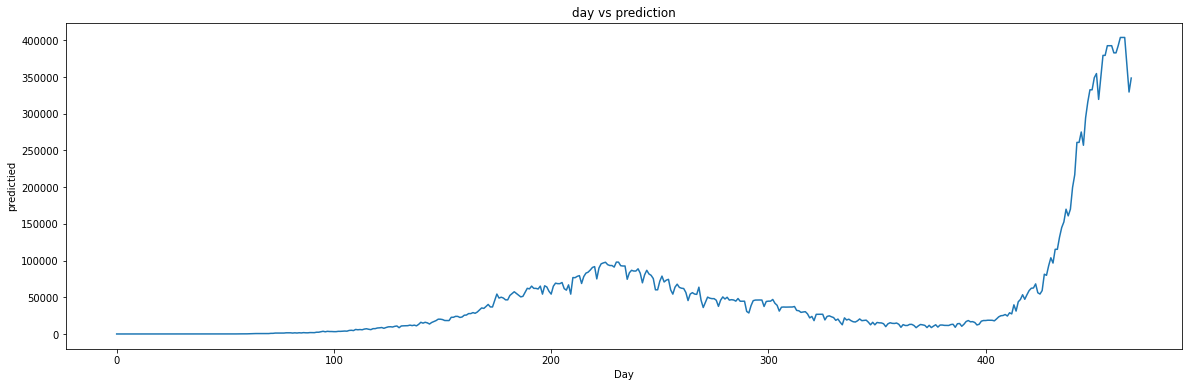

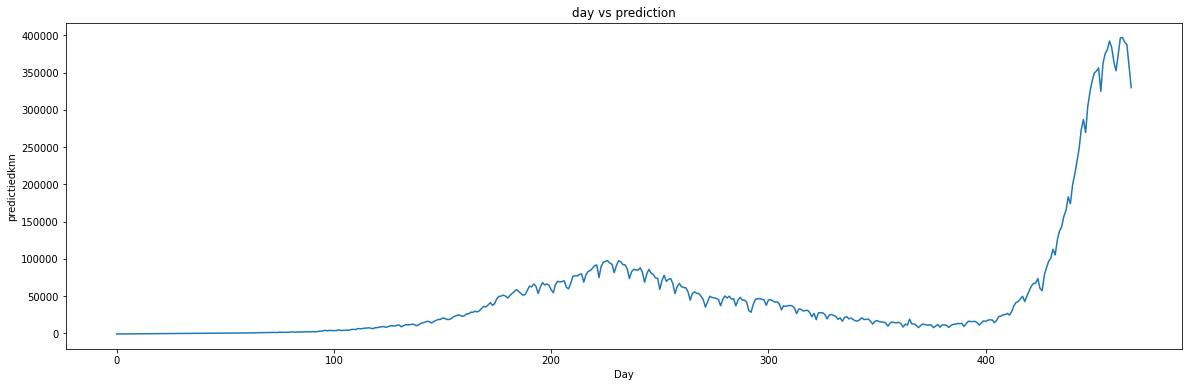

In [ ]:
import matplotlib.pyplot as plt

plt.plot( range(468),predictions)
plt.title('day vs prediction')
plt.xlabel('Day')
plt.ylabel('predictied')
plt.show()



import matplotlib.pyplot as plt

plt.plot( range(468),predictionsp)
plt.title('day vs prediction')
plt.xlabel('Day')
plt.ylabel('predictiedknn')
plt.show()

# Testing Phase

This part is Still under optimization 

# Limitation
1. ML models tend to perform poorly on timeseries data
2. There seems to be over fitting

# Future Steps:
1. WE shall use LSTM and other time series algorthims to better optimize the data.

In [ ]:
import copy

# newx=copy.deepcopy(x)
newx=[]
a=int(input())
prev=23340344
pred=[[329491]]

for i in range(1,a+1):    
    n=[[467+i,prev,pred[0][0]]]
    df=pd.DataFrame(n)
    pred=model5.predict(df)
    prev+=pred[0][0]
    newx.extend(n)
print(pred)
print(newx)
newx=pd.DataFrame(newx,columns=x.columns)
newx


100
[[591798.29000416]]
[[468, 23340344, 329491], [469, 23670215.98982891, 329871.98982891015], [470, 24000507.102829598, 330291.1130006854], [471, 24331274.624989495, 330767.52215989766], [472, 24662589.82646324, 331315.20147374633], [473, 24994533.610186026, 331943.7837227833], [474, 25327192.927886873, 332659.3177008492], [475, 25660657.89636621, 333464.96847933705], [476, 25995019.536813434, 334361.6404472246], [477, 26330368.055695683, 335348.51888224756], [478, 26666791.585994385, 336423.5302987032], [479, 27004375.311119072, 337583.72512468824], [480, 27343200.899675693, 338825.5885566211], [481, 27683346.186561275, 340145.2868855817], [482, 28024885.043903887, 341538.857342612], [483, 28367887.39361576, 343002.3497118722], [484, 28712419.32135805, 344531.92774229054], [485, 29058543.259225413, 346123.93786736316], [486, 29406318.211247012, 347774.9520216007], [487, 29755800.001754697, 349481.79050768405], [488, 30107041.53174624, 351241.5299915409], [489, 30460093.03258453, 353

,days_from_start,previous_confirmed,previous_rise
0,468,2.334034e+07,329491.000000
1,469,2.367022e+07,329871.989829
2,470,2.400051e+07,330291.113001
3,471,2.433127e+07,330767.522160
4,472,2.466259e+07,331315.201474
...,...,...,...
95,563,6.387715e+07,571753.675388
96,564,6.445285e+07,575706.392502
97,565,6.503254e+07,579687.073366
98,566,6.561623e+07,583695.855982


In [ ]:
newx2=copy.deepcopy(x)
newx3=pd.concat([newx2, newx], axis = 0,ignore_index=True)
newx3

,days_from_start,previous_confirmed,previous_rise
0,0,0.000000e+00,0.000000
1,1,1.000000e+00,1.000000
2,2,1.000000e+00,0.000000
3,3,1.000000e+00,0.000000
4,4,2.000000e+00,1.000000
...,...,...,...
563,563,6.387715e+07,571753.675388
564,564,6.445285e+07,575706.392502
565,565,6.503254e+07,579687.073366
566,566,6.561623e+07,583695.855982


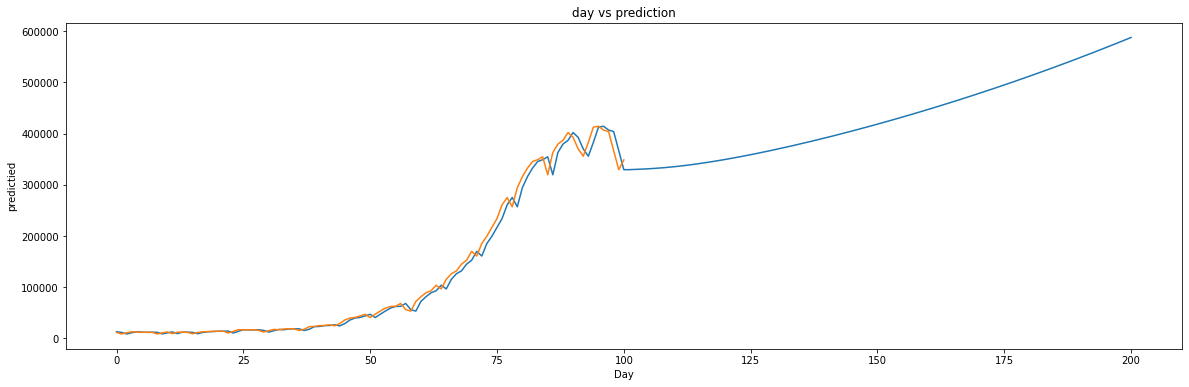

In [ ]:
import matplotlib.pyplot as plt


plt.plot( range(newx3.shape[0]-367),newx3["previous_rise"][367:])
plt.title('day vs prediction')
plt.xlabel('Day')
plt.ylabel('predictiedknn')


plt.plot( range(468-367),actuals[367:])
plt.title('day vs prediction')
plt.xlabel('Day')
plt.ylabel('predictied')

plt.show()

# Under Development 

We are trying to find better hyper paramters on the existing models and create better models.

In [ ]:
knnclf.predict([[468,49044444]])
rnd_clf.predict([[463,49044444]])

ValueError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
                 
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(x_train, y_train)

In [ ]:
predgbr=grid_GBR.predict(x_test)
rmsegbr=mean_squared_error(predgbr,y_test)

In [ ]:
grid_GBR.predict([[468,2323233]])